## Digital Image Processing, ECE419

Ernesto Colon

The Cooper Union Department of Electrical Engineering


February 26th, 2021

References:
- Digital Image Processing Using Matlab [DIPUM] by Gonzalez et al., 3rd ed
- Digital Image Processing by Gonzalez et al., 4th ed

**The following set of notes and example scripts are part of my independent study sessions and adapted from the references outlined above. My main reference is DIPUM and complemented with online documentation. As I go through the theory and textbook examples, I am translating the code and image processing techniques to Python.**

## Morphological Image Processing Notes / Exercises

In [1]:
# Importing the libraries
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import ec_img_utils
import skimage.util
from skimage import io
import scipy.fft
from skimage import transform
from skimage import morphology

**Example 10.1 from DIPUM - An application of dilation**

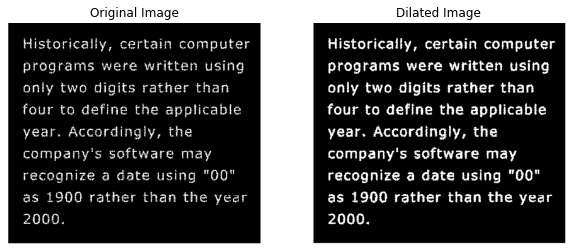

In [2]:
# load broken text image
img_broken_text = io.imread('./images/text-broken.tif')

# define the structuring element
text_strel = np.array([[0., 1., 0.],
                       [1., 1., 1.],
                       [0., 1., 0.]])

# dilate image
img_broken_text_dil = morphology.dilation(img_broken_text, text_strel)

# display both images
fig_text_dil, ax_text_dil = plt.subplots(1, 2, figsize=(10, 5))
ax_text_dil = ax_text_dil.ravel()

ax_text_dil[0].imshow(img_broken_text, cmap='gray')
ax_text_dil[0].set_title("Original Image")
ax_text_dil[0].axis('off')


ax_text_dil[1].imshow(img_broken_text_dil, cmap='gray')
ax_text_dil[1].set_title("Dilated Image")
ax_text_dil[1].axis('off');

Note how the dilated image has expanded the text characters and achieved a better image.

**Example 10.3 from DIPUM - An illustration of erosion**

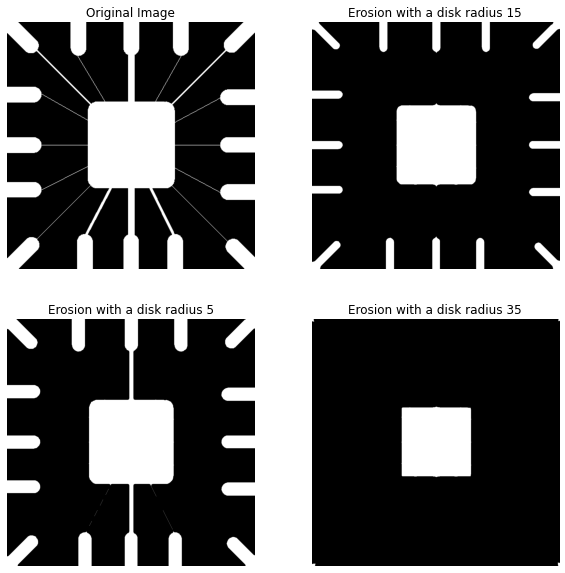

In [3]:
# load the circuit mask image
img_ckt_mask = io.imread('././images/circuitmask.tif')

# create structuring elements
disk_strel_15 = morphology.disk(15)
disk_strel_5 = morphology.disk(5)
disk_strel_35 = morphology.disk(35)

# erode the original image
img_ckt_mask_ero_15 = morphology.erosion(img_ckt_mask, disk_strel_15)
img_ckt_mask_ero_5 = morphology.erosion(img_ckt_mask, disk_strel_5)
img_ckt_mask_ero_35 = morphology.erosion(img_ckt_mask, disk_strel_35)


# display all the images
fig_ckt_ero, ax_ckt_ero = plt.subplots(2, 2, figsize=(10,10))
ax_ckt_ero = ax_ckt_ero.ravel()

ax_ckt_ero[0].imshow(img_ckt_mask, cmap='gray')
ax_ckt_ero[0].set_title("Original Image")
ax_ckt_ero[0].axis('off')

ax_ckt_ero[1].imshow(img_ckt_mask_ero_15, cmap='gray')
ax_ckt_ero[1].set_title("Erosion with a disk radius 15")
ax_ckt_ero[1].axis('off')

ax_ckt_ero[2].imshow(img_ckt_mask_ero_5, cmap='gray')
ax_ckt_ero[2].set_title("Erosion with a disk radius 5")
ax_ckt_ero[2].axis('off')

ax_ckt_ero[3].imshow(img_ckt_mask_ero_35, cmap='gray')
ax_ckt_ero[3].set_title("Erosion with a disk radius 35")
ax_ckt_ero[3].axis('off');

Opening and closing

**Example 10.4 from DIPUM**

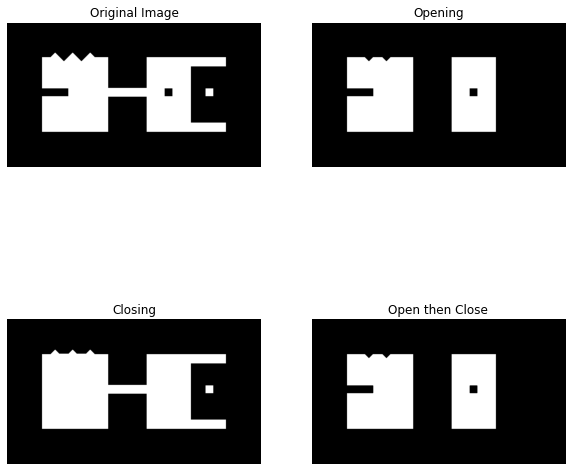

In [4]:
# load the shapes image
img_shapes = io.imread('./images/shapes.tif')

# create structuring element
shapes_strel = morphology.square(40)

# perform opening operation
img_shapes_opening = morphology.opening(img_shapes, shapes_strel)

# perform closing operation
img_shapes_closing = morphology.closing(img_shapes, shapes_strel)

# close the result of the first opening operation
img_shapes_open_close = morphology.closing(img_shapes_opening)

# display the images
fig_shapes, ax_shapes = plt.subplots(2, 2, figsize=(10,10))
ax_shapes = ax_shapes.ravel()

ax_shapes[0].imshow(img_shapes, cmap='gray')
ax_shapes[0].set_title("Original Image")
ax_shapes[0].axis('off')

ax_shapes[1].imshow(img_shapes_opening, cmap='gray')
ax_shapes[1].set_title("Opening")
ax_shapes[1].axis('off')

ax_shapes[2].imshow(img_shapes_closing, cmap='gray')
ax_shapes[2].set_title("Closing")
ax_shapes[2].axis('off')

ax_shapes[3].imshow(img_shapes_open_close, cmap='gray')
ax_shapes[3].set_title("Open then Close")
ax_shapes[3].axis('off');

A sequence of open and closing can be used for **noise reduction**

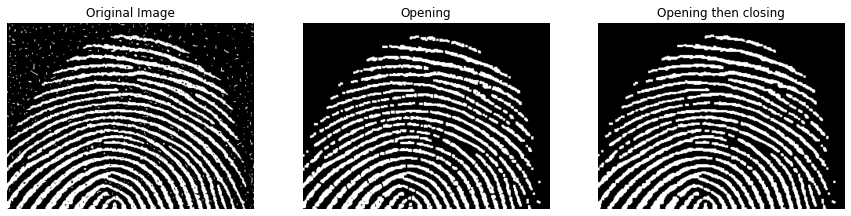

In [5]:
# load noisy thumb pring image
img_thumb_noisy = io.imread('./images/thumbprint.tif')

# create square structuring element of width = 5
square_strel = morphology.square(5)

# open the image to denoise
img_thumb_open = morphology.opening(img_thumb_noisy, square_strel)

# close the image to bridge the gaps left by the opening operation
img_thumb_open_close = morphology.closing(img_thumb_open, square_strel)

# display the images
fig_thumb, ax_thumb = plt.subplots(1, 3, figsize=(15,5))
ax_thumb = ax_thumb.ravel()

ax_thumb[0].imshow(img_thumb_noisy, cmap='gray')
ax_thumb[0].set_title("Original Image")
ax_thumb[0].axis('off')

ax_thumb[1].imshow(img_thumb_open, cmap='gray')
ax_thumb[1].set_title("Opening")
ax_thumb[1].axis('off')

ax_thumb[2].imshow(img_thumb_open_close, cmap='gray')
ax_thumb[2].set_title("Opening then closing")
ax_thumb[2].axis('off');


I want to show the difference between the oepning image shown above and the composite operation to see if we actually
filled in some of the gaps.

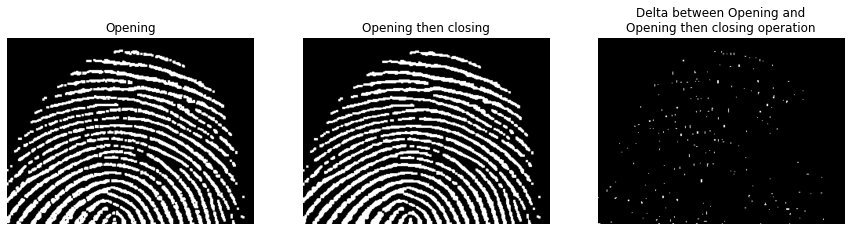

In [6]:
# to compute the delta, we can compute an XOR operation to get the exclusive disjunction sets
img_thumb_opn_cls_delta = np.bitwise_xor(img_thumb_open, img_thumb_open_close)

# display the images
fig_thumb_2, ax_thumb_2 = plt.subplots(1, 3, figsize=(15,5))
ax_thumb_2 = ax_thumb_2.ravel()

ax_thumb_2[0].imshow(img_thumb_open, cmap='gray')
ax_thumb_2[0].set_title("Opening")
ax_thumb_2[0].axis('off')

ax_thumb_2[1].imshow(img_thumb_open_close, cmap='gray')
ax_thumb_2[1].set_title("Opening then closing")
ax_thumb_2[1].axis('off')

ax_thumb_2[2].imshow(img_thumb_opn_cls_delta, cmap='gray')
ax_thumb_2[2].set_title("Delta between Opening and\nOpening then closing operation")
ax_thumb_2[2].axis('off');

Note from the XOR image displayed above that the closing operation performed on the first opening was able to 'fill' in
some of the holes left behind by the opening.